In [19]:
import pandas as pd

# Load the dataset
df = pd.read_csv('ev_population.csv')



In [20]:
# Check for missing values
print(df.isnull().sum())

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        36
Base MSRP                                             36
Legislative District                                 494
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64


In [21]:
# Drop rows with missing values in key columns
df.dropna(subset=['Make', 'Model', 'Model Year', 'Electric Vehicle Type'], inplace=True)

# Convert Model Year to integer
df['Model Year'] = df['Model Year'].astype(int)

# Optional: Strip spaces from column names
df.columns = df.columns.str.strip()

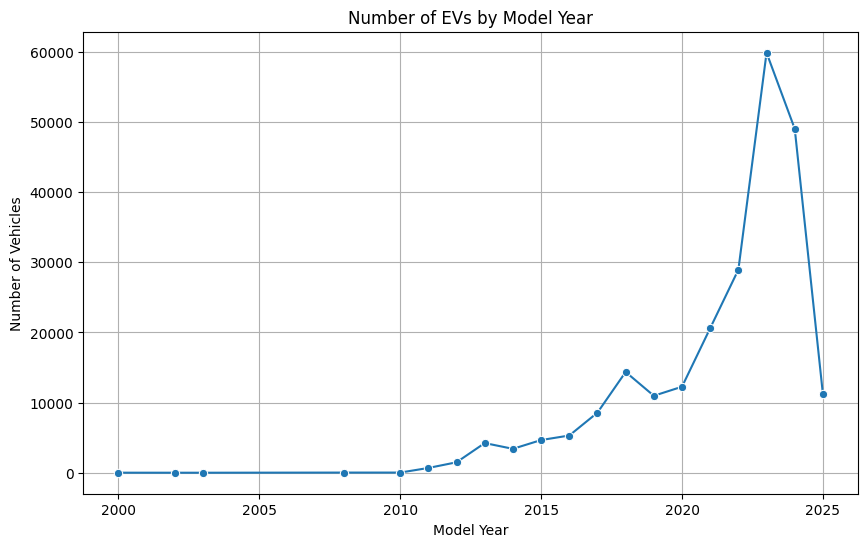

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count by model year
model_year_count = df['Model Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(x=model_year_count.index, y=model_year_count.values, marker='o')
plt.title("Number of EVs by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles")
plt.grid(True)
plt.show()

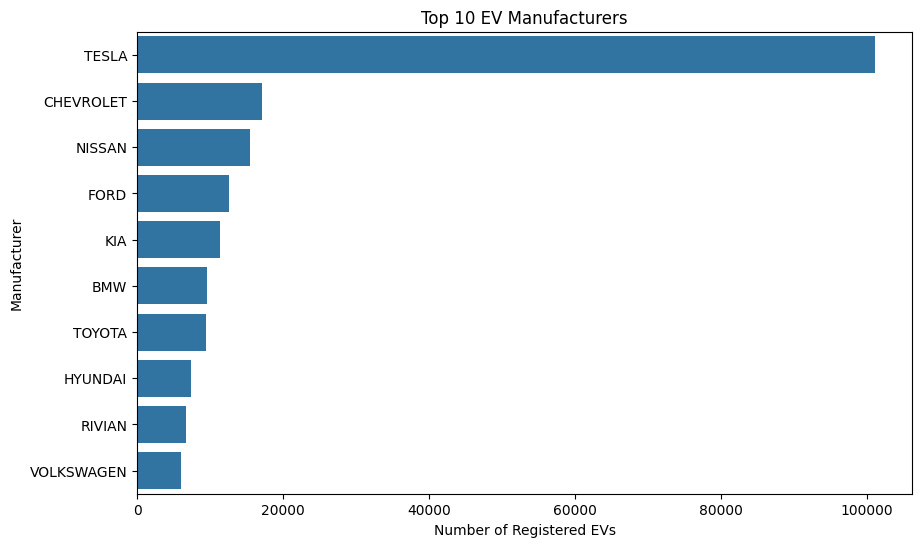

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

top_makes = df['Make'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_makes.values, y=top_makes.index)
plt.title("Top 10 EV Manufacturers")
plt.xlabel("Number of Registered EVs")
plt.ylabel("Manufacturer")
plt.show()


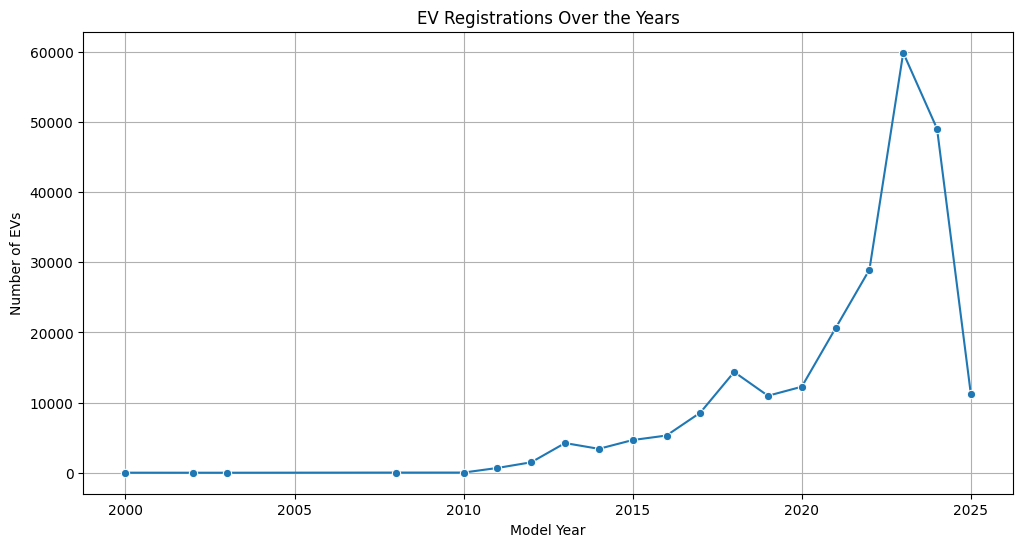

In [24]:
evs_per_year = df['Model Year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=evs_per_year.index, y=evs_per_year.values, marker='o')
plt.title("EV Registrations Over the Years")
plt.xlabel("Model Year")
plt.ylabel("Number of EVs")
plt.grid(True)
plt.show()


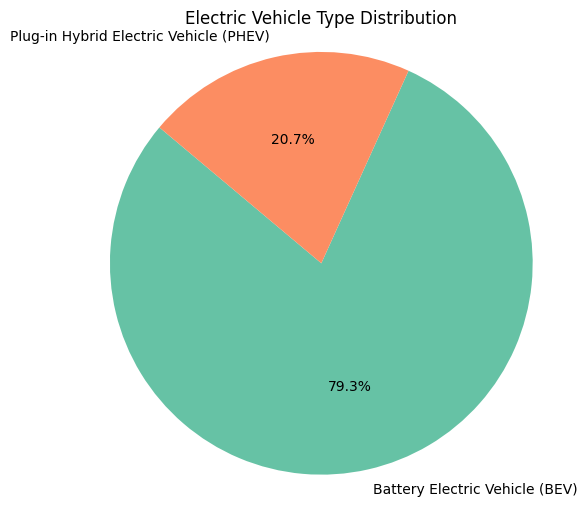

In [25]:
ev_type_dist = df['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(ev_type_dist, labels=ev_type_dist.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5','#fc8d62'])
plt.title("Electric Vehicle Type Distribution")
plt.axis('equal')
plt.show()

C:\Users\ayush\AppData\Local\Temp\ipykernel_8592\1672132557.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_counties.values, y=top_counties.index,palette='magma')


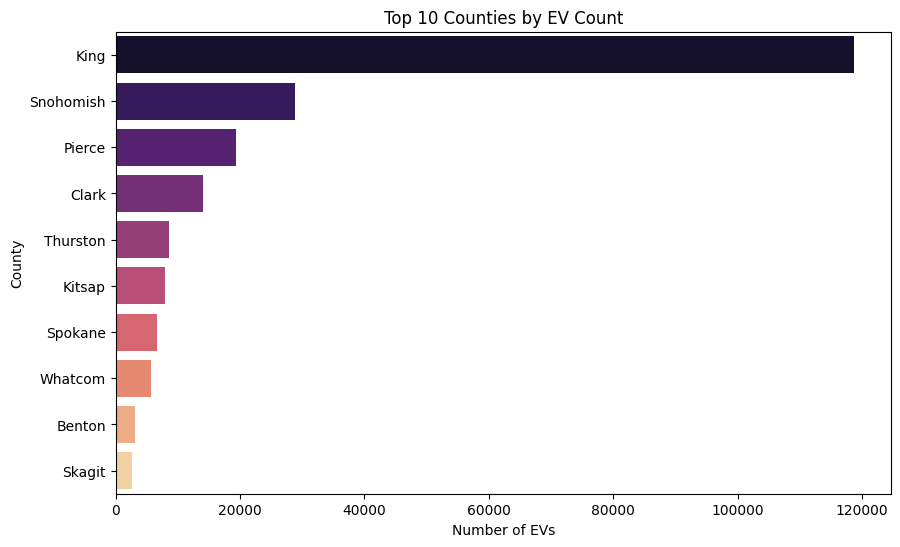

In [26]:
top_counties = df['County'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_counties.values, y=top_counties.index,palette='magma')
plt.title("Top 10 Counties by EV Count")
plt.xlabel("Number of EVs")
plt.ylabel("County")
plt.show()

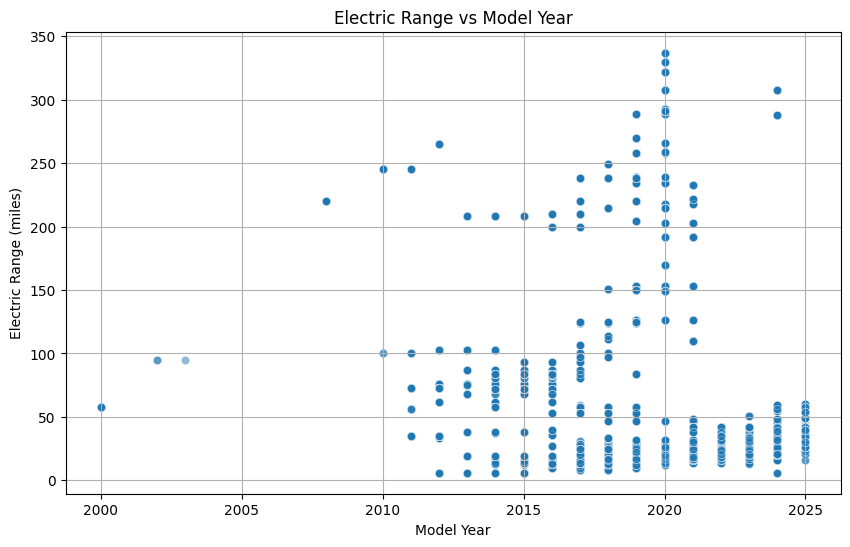

In [27]:
# Clean Electric Range (remove zero or NaN)
filtered_df = df[df['Electric Range'] > 0]

plt.figure(figsize=(10,6))
sns.scatterplot(data=filtered_df, x='Model Year', y='Electric Range', alpha=0.5)
plt.title("Electric Range vs Model Year")
plt.xlabel("Model Year")
plt.ylabel("Electric Range (miles)")
plt.grid(True)
plt.show()
